In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, roc_auc_score,auc,roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


Comentar el contexto del caso: problema, objetivo, etc. (1 punto)

Análisis univariado y bivariado más representativo. ¿Cuáles son los insights? (2 puntos)

En base a una muestra de entrenamiento (80) y validación (20), con los modelos de Regresión Logística, KNN y Naive Bayes y haciendo uso de validación cruzada (k=5), presentar: 

In [153]:
def evaluate_model(classifier, X_test, y_test, model_name):
  y_pred = classifier.predict(X_test)
  y_pred_prob = classifier.predict_proba(X_test)
  
  sensibilidad = recall_score(y_test, y_pred)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)
  gini = 2 * roc_auc - 1
  false_positive_rate_todo.append(false_positive_rate)
  true_positive_rate_todo.append(true_positive_rate)
  return {
      'Modelo': model_name,
      'Sensibilidad': sensibilidad,
      'ROC': roc_auc,
      'GINI': gini
  }

In [154]:
false_positive_rate_todo =[]
true_positive_rate_todo = []
resultados = []
sc = StandardScaler()
sm = SMOTE(random_state=0)
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

In [155]:
X = pd.read_csv('churn-bigml-80.csv')
X["flag_muestra"] = "train"
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [156]:
y = pd.read_csv('churn-bigml-20.csv')
y["flag_muestra"] = "test"
y.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test


In [157]:
data = X._append(y)
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,13.23,247.6,94,11.14,11.5,7,3.11,2,False,test
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,17.33,229.5,73,10.33,8.1,3,2.19,1,False,test
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,7.23,210.1,134,9.45,13.2,8,3.56,3,False,test
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,16.80,193.7,82,8.72,11.6,4,3.13,1,False,test


In [158]:
data['Area code'] = data['Area code'].astype(object)

In [159]:
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']

In [160]:
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns), column='Total calls', value=total_calls)

In [161]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']


In [162]:
data = data.rename(columns = {'International plan':'International_plan'})
data = data.rename(columns = {'Voice mail plan':'Voice_mail_plan'})

In [163]:
data['c_International_plan'] = LabelEncoder().fit_transform(data.International_plan.values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data.Voice_mail_plan.values)

# UNIVARIADO

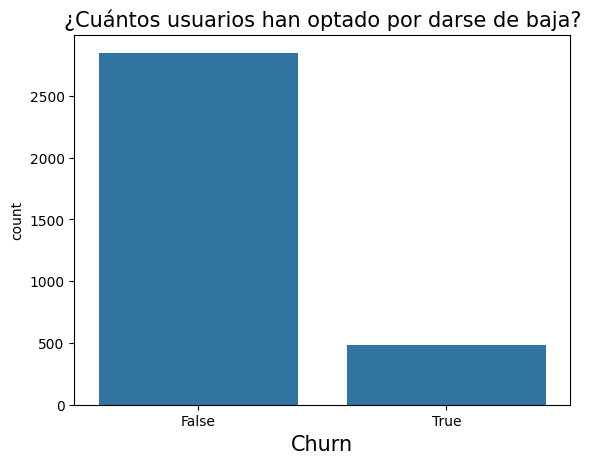

In [164]:
sns.countplot(data = data, x = 'Churn')
plt.xlabel('Churn', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por darse de baja?', fontsize = 15)
plt.show()

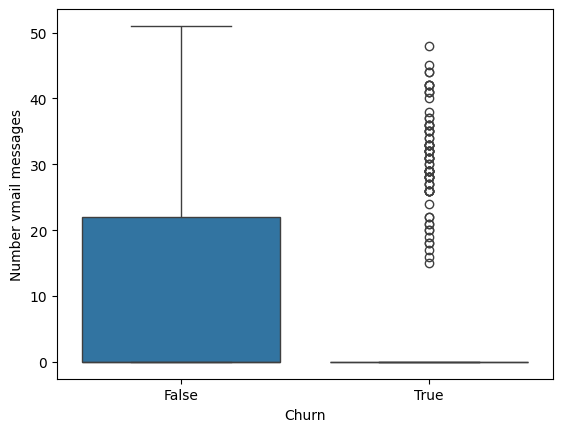

In [165]:
sns.boxplot(x='Churn',y='Number vmail messages',data=data)
plt.show()

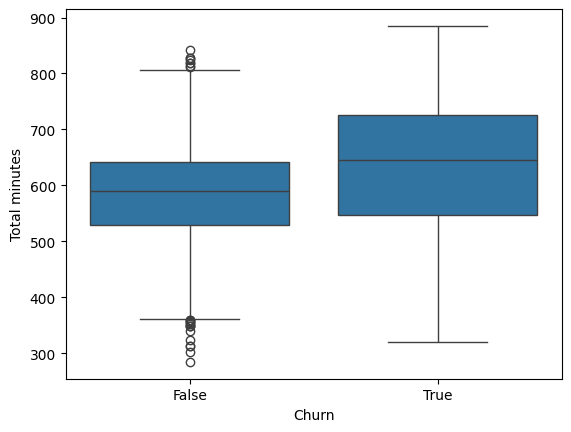

In [166]:
sns.boxplot(x='Churn',y='Total minutes',data=data)
plt.show()

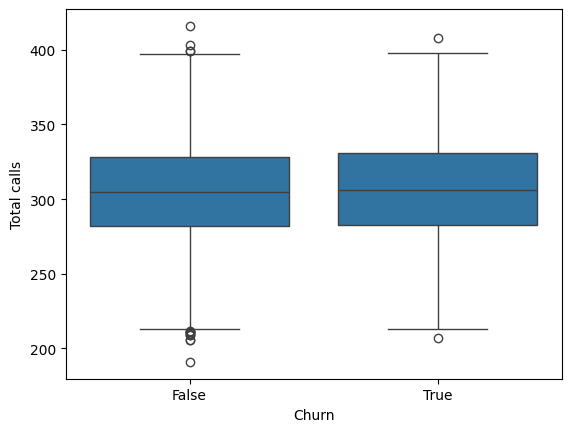

In [167]:
sns.boxplot(x='Churn',y='Total calls',data=data)
plt.show()

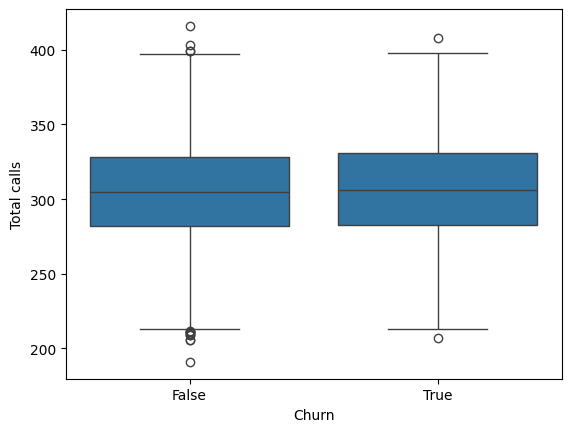

In [168]:
sns.boxplot(x='Churn',y='Total calls',data=data)
plt.show()

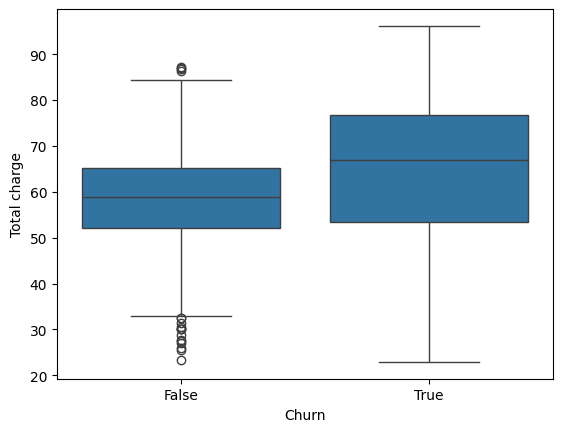

In [169]:
sns.boxplot(x='Churn',y='Total charge',data=data)
plt.show()

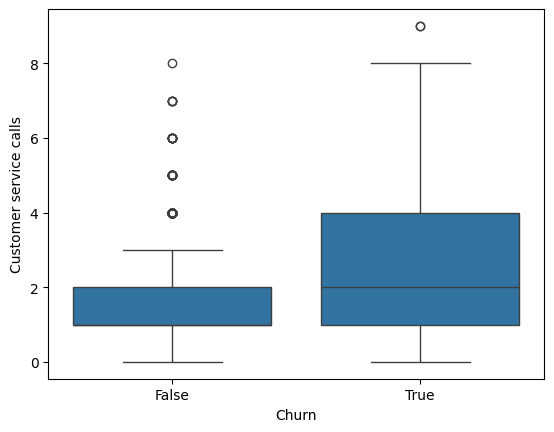

In [170]:
sns.boxplot(x='Churn',y='Customer service calls',data=data)
plt.show()

# MULTIVARIADO

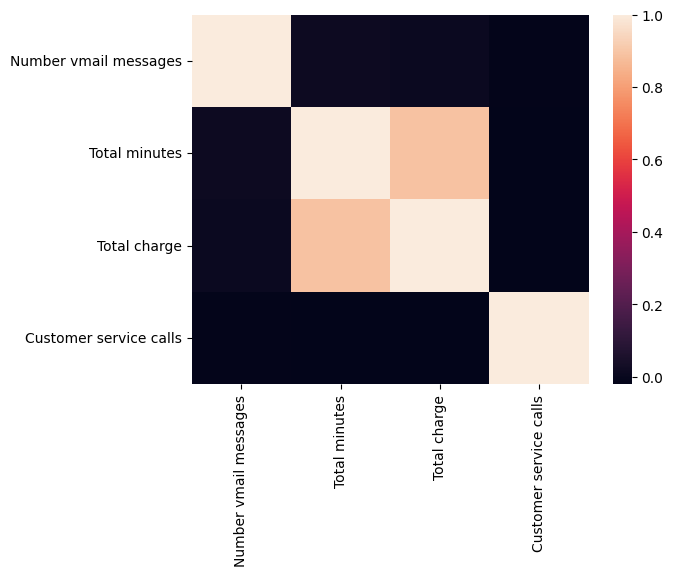

In [171]:
sns.heatmap(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson"))
plt.show()

In [172]:
data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson")

,Number vmail messages,Total minutes,Total charge,Customer service calls
Number vmail messages,1.000000,0.014779,0.009766,-0.013263
Total minutes,0.014779,1.000000,0.890804,-0.020969
Total charge,0.009766,0.890804,1.000000,-0.019873
Customer service calls,-0.013263,-0.020969,-0.019873,1.000000


In [173]:
ss.pearsonr(data['Total minutes'],data['Total charge'])

PearsonRResult(statistic=0.8908044705030175, pvalue=0.0)

In [174]:
data['Churn'] = data['Churn'].astype('int64')

In [175]:
data.Churn.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [176]:
X = data[['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls']]
y = data['Churn']

In [177]:
X = X.to_numpy()

In [178]:
y = y.to_numpy()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Base

In [180]:
X_train_base = sc.fit_transform(X_train)
X_test_base = sc.transform(X_test)
X_train_base[:5],X_train_base.shape, X_test_base[:5],X_test_base.shape

(array([[-0.32732684,  1.63467927,  2.58447177, -0.74233081, -0.38804139,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.14543277,  0.19371111,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.61179423,  0.13926137,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.93199934, -0.53133018,
         -1.19331328],
        [-0.32732684, -0.6117408 , -0.58560639,  0.599853  ,  0.79170302,
          1.05606678]]),
 (2666, 6),
 array([[-0.32732684, -0.6117408 , -0.58560639, -0.38084489, -0.66697691,
         -0.44351992],
        [-0.32732684,  1.63467927,  1.47863055, -0.97885863, -0.32594958,
          1.05606678],
        [-0.32732684,  1.63467927,  1.99468979,  0.39121761,  0.68566931,
         -1.19331328],
        [-0.32732684, -0.6117408 , -0.58560639,  0.90778545,  1.039115  ,
          1.80586013],
        [-0.32732684,  1.63467927,  1.62607605,  1.05840458,  0.47742293,
         -1.19331328]]),
 (667, 6))

In [181]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_base, y_train)
resultados.append(evaluate_model(knn_classifier, X_test_base, y_test, "KNN_Base"))

In [182]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_base, y_train)
resultados.append(evaluate_model(nb_classifier, X_test_base, y_test, "Naive Bayes_Base"))

In [183]:
rl_classifier = LogisticRegression(random_state=0)
rl_classifier.fit(X_train_base, y_train)
resultados.append(evaluate_model(rl_classifier, X_test_base, y_test, "RL_Base"))

# SMOTE

In [184]:
X_train_smote = sc.fit_transform(X_train)
X_test_smote = sc.transform(X_test)
X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train)
X_train_smote[:5], X_test_smote[:5]

(array([[-0.32732684,  1.63467927,  2.58447177, -0.74233081, -0.38804139,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.14543277,  0.19371111,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.61179423,  0.13926137,
         -0.44351992],
        [-0.32732684, -0.6117408 , -0.58560639, -0.93199934, -0.53133018,
         -1.19331328],
        [-0.32732684, -0.6117408 , -0.58560639,  0.599853  ,  0.79170302,
          1.05606678]]),
 array([[-0.32732684, -0.6117408 , -0.58560639, -0.38084489, -0.66697691,
         -0.44351992],
        [-0.32732684,  1.63467927,  1.47863055, -0.97885863, -0.32594958,
          1.05606678],
        [-0.32732684,  1.63467927,  1.99468979,  0.39121761,  0.68566931,
         -1.19331328],
        [-0.32732684, -0.6117408 , -0.58560639,  0.90778545,  1.039115  ,
          1.80586013],
        [-0.32732684,  1.63467927,  1.62607605,  1.05840458,  0.47742293,
         -1.19331328]]))

In [185]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_smote, y_train_smote)
resultados.append(evaluate_model(knn_classifier, X_test_smote, y_test, "KNN_SMOTE"))

In [186]:
rl_classifier = LogisticRegression(random_state=0)
rl_classifier.fit(X_train_smote, y_train_smote)
resultados.append(evaluate_model(rl_classifier, X_test_smote, y_test, "RL_SMOTE"))

In [187]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_smote, y_train_smote)
resultados.append(evaluate_model(nb_classifier, X_test_smote, y_test, "Naive Bayes_SMOTE"))

# Oversampling

In [188]:
X_train_oversamplig, y_train_oversampling = ros.fit_resample(X_train, y_train)
X_train_oversamplig = sc.fit_transform(X_train_oversamplig)
X_test_oversamplig = sc.transform(X_test)
X_train_oversamplig[:5], X_test_oversamplig[:5]

(array([[-0.46560386,  1.81280235,  2.76907703, -0.82589898, -0.51694348,
         -0.53744621],
        [-0.46560386, -0.55163212, -0.52987585, -0.29304455, -0.01846662,
         -0.53744621],
        [-0.46560386, -0.55163212, -0.52987585, -0.7093682 , -0.06512209,
         -0.53744621],
        [-0.46560386, -0.55163212, -0.52987585, -0.99521721, -0.63972103,
         -1.16458159],
        [-0.46560386, -0.55163212, -0.52987585,  0.37227649,  0.49392503,
          0.71682456]]),
 array([[-0.46560386, -0.55163212, -0.52987585, -0.50319836, -0.75595045,
         -0.53744621],
        [-0.46560386,  1.81280235,  1.61827951, -1.03704877, -0.46373988,
          0.71682456],
        [-0.46560386,  1.81280235,  2.15531835,  0.18602644,  0.40306964,
         -1.16458159],
        [-0.46560386, -0.55163212, -0.52987585,  0.64716961,  0.70592093,
          1.34395994],
        [-0.46560386,  1.81280235,  1.77171918,  0.78162821,  0.22463293,
         -1.16458159]]))

In [189]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_oversamplig, y_train_oversampling)
resultados.append(evaluate_model(knn_classifier, X_test_oversamplig, y_test, "KNN_Oversampling"))

In [190]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_oversamplig, y_train_oversampling)
resultados.append(evaluate_model(nb_classifier, X_test_oversamplig, y_test, "Naive Bayes_Oversampling"))

In [191]:
rl_classifier = LogisticRegression(random_state=0)
rl_classifier.fit(X_train_oversamplig, y_train_oversampling)
resultados.append(evaluate_model(rl_classifier, X_test_oversamplig, y_test, "RL_Oversampling"))

# Undersampling

In [192]:
X_train_undersampling, y_train_undersampling = rus.fit_resample(X_train, y_train)
X_train_undersampling = sc.fit_transform(X_train_undersampling)
X_test_undersampling = sc.transform(X_test)
X_train_undersampling[:5], X_test_undersampling[:5]

(array([[-0.4472136 , -0.5398062 , -0.51830431,  0.05623083, -0.28314198,
          0.08224225],
        [-0.4472136 , -0.5398062 , -0.51830431,  0.1337098 ,  0.18910567,
         -1.1513915 ],
        [ 2.23606798,  1.85251672,  2.26928142, -0.08581394, -0.26550285,
         -0.53457463],
        [-0.4472136 ,  1.85251672,  1.10778736,  0.7416217 ,  1.24905712,
          1.93269288],
        [-0.4472136 ,  1.85251672,  1.8046838 ,  0.45753215,  0.44326952,
          0.08224225]]),
 array([[-0.4472136 , -0.5398062 , -0.51830431, -0.45532902, -0.70487758,
         -0.53457463],
        [-0.4472136 ,  1.85251672,  1.64981792, -0.98774859, -0.41864258,
          0.69905913],
        [-0.4472136 ,  1.85251672,  2.19184848,  0.23204849,  0.43044106,
         -1.1513915 ],
        [-0.4472136 , -0.5398062 , -0.51830431,  0.69195569,  0.72709918,
          1.315876  ],
        [-0.4472136 ,  1.85251672,  1.8046838 ,  0.82605391,  0.25565331,
         -1.1513915 ]]))

In [193]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_undersampling, y_train_undersampling)
resultados.append(evaluate_model(knn_classifier, X_test_undersampling, y_test, "KNN_Undersampling"))

In [194]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_undersampling, y_train_undersampling)
resultados.append(evaluate_model(nb_classifier, X_test_oversamplig, y_test, "Naive Bayes_Undersampling"))

In [195]:
rl_classifier = LogisticRegression(random_state=0)
rl_classifier.fit(X_train_undersampling, y_train_undersampling)
resultados.append(evaluate_model(rl_classifier, X_test_oversamplig, y_test, "RL_Undersampling"))

In [196]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                       Modelo  Sensibilidad       ROC      GINI
0                    KNN_Base      0.677419  0.903610  0.807220
1            Naive Bayes_Base      0.537634  0.857724  0.715447
2                     RL_Base      0.182796  0.869788  0.739575
3                   KNN_SMOTE      0.817204  0.896416  0.792833
4                    RL_SMOTE      0.806452  0.869338  0.738676
5           Naive Bayes_SMOTE      0.849462  0.858604  0.717208
6            KNN_Oversampling      0.817204  0.882414  0.764827
7    Naive Bayes_Oversampling      0.849462  0.857911  0.715822
8             RL_Oversampling      0.806452  0.868870  0.737739
9           KNN_Undersampling      0.849462  0.903544  0.807089
10  Naive Bayes_Undersampling      0.763441  0.851092  0.702184
11           RL_Undersampling      0.806452  0.867465  0.734929


In [197]:
df_resultados

,Modelo,Sensibilidad,ROC,GINI
0,KNN_Base,0.677419,0.903610,0.807220
1,Naive Bayes_Base,0.537634,0.857724,0.715447
2,RL_Base,0.182796,0.869788,0.739575
3,KNN_SMOTE,0.817204,0.896416,0.792833
4,RL_SMOTE,0.806452,0.869338,0.738676
5,Naive Bayes_SMOTE,0.849462,0.858604,0.717208
6,KNN_Oversampling,0.817204,0.882414,0.764827
7,Naive Bayes_Oversampling,0.849462,0.857911,0.715822
8,RL_Oversampling,0.806452,0.868870,0.737739
9,KNN_Undersampling,0.849462,0.903544,0.807089


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


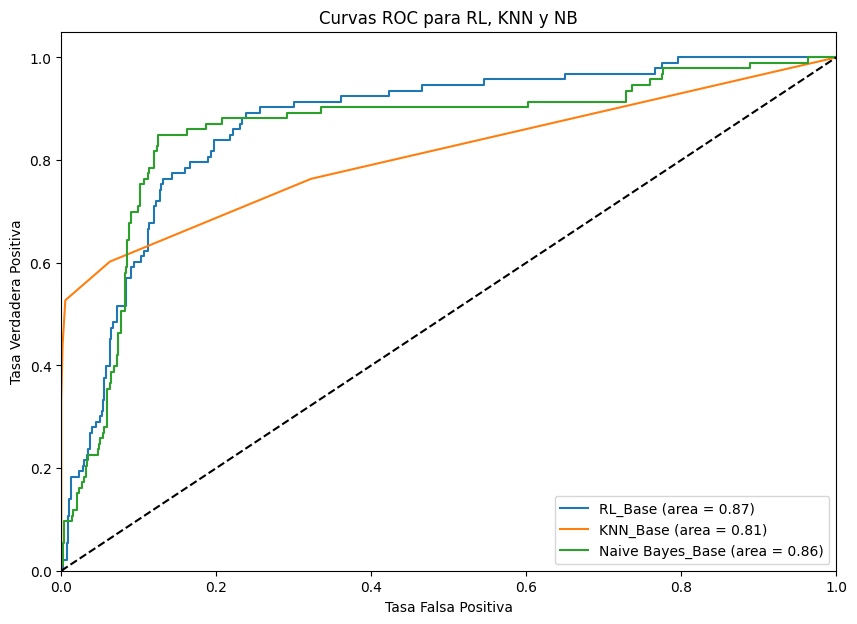

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc



# Modelos a evaluar
models = {
    "RL_Base": LogisticRegression(random_state=0),
    "KNN_Base": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes_Base": GaussianNB()
}

plt.figure(figsize=(10, 7))

# Calcular y graficar la curva ROC para cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsa Positiva')
plt.ylabel('Tasa Verdadera Positiva')
plt.title('Curvas ROC para RL, KNN y NB')
plt.legend(loc="lower right")
plt.show()


In [199]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
ss.shapiro(X['Number vmail messages'])

ShapiroResult(statistic=0.6197336912155151, pvalue=0.0)

In [ ]:
for a in X.columns:
  print(a)
  #columna = a.
  #ss.shapiro(X[''+a+''])

State


AttributeError: 'str' object has no attribute 'type'

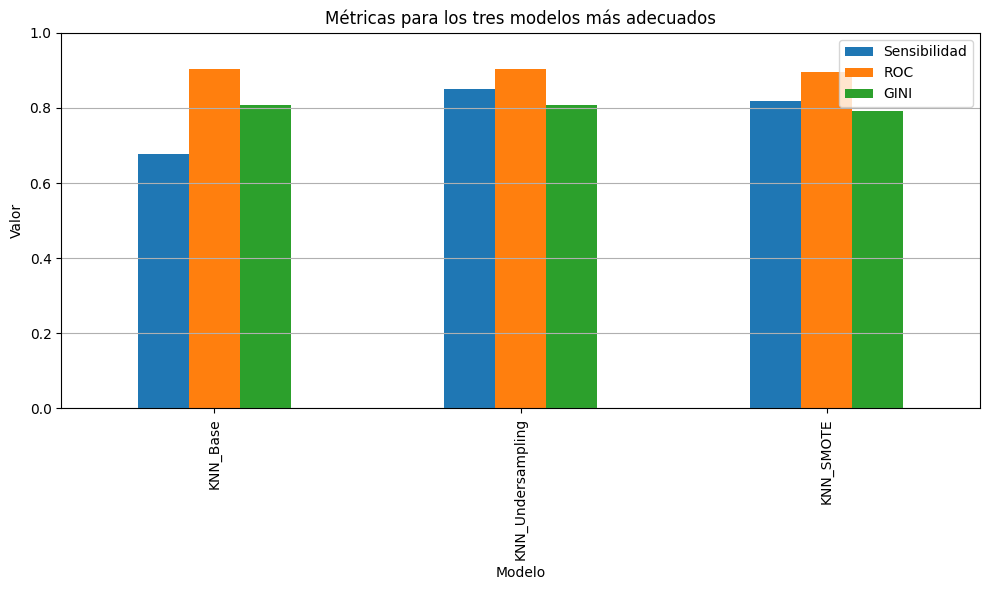

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_resultados ya está definido
# Seleccionar los tres modelos más adecuados basados en GINI (por ejemplo)
top_3_models = df_resultados.nlargest(3, 'GINI')

# Graficar Sensibilidad, ROC, y GINI para estos modelos
fig, ax = plt.subplots(figsize=(10, 6))
top_3_models.set_index('Modelo')[['Sensibilidad', 'ROC', 'GINI']].plot(kind='bar', ax=ax)
plt.title('Métricas para los tres modelos más adecuados')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.ylim([0, 1])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


NameError: name 'false_positive_rate' is not defined

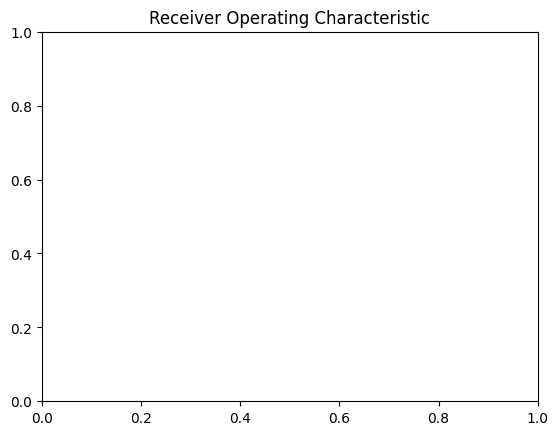

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
def evaluate_model(classifier, X_test, y_test, model_name):
  y_pred = classifier.predict(X_test)
  y_pred_prob = classifier.predict_proba(X_test)
  
  sensibilidad = recall_score(y_test, y_pred)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)
  gini = 2 * roc_auc - 1
  
  return {
      'Modelo': model_name,
      'Sensibilidad': sensibilidad,
      'ROC': roc_auc,
      'GINI': gini
  }

data = pd.read_csv('datos/Social_Network_Ads.csv')
data.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train_base = sc.fit_transform(X_train)
X_test_base = sc.transform(X_test)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_base, y_train)
resultados.append(evaluate_model(knn_classifier, X_test_base, y_test, "KNN_Base"))
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_base, y_train)
resultados.append(evaluate_model(nb_classifier, X_test_base, y_test, "Naive Bayes_Base"))



